In [118]:
import os
# Making sure we are working in the correct directories. Change directories as necessary
os.chdir('C:\\Users\\Gael R. Gatera\\Downloads')
print (os.getcwd())

C:\Users\Gael R. Gatera\Downloads


In [119]:
# Dependencies and Setup
from datetime import datetime
from random import uniform
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from config import api_weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#url = "http://api.openweathermap.org/data/2.5/weather?"

# Generate Cities List

In [128]:
# Create a df to lat, lon 
column_headers = ["City", "Country"]
citiesdf = pd.DataFrame(columns=column_headers)

# Randomly generate a list of 1500 cities.
for x in range(1500):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    citiesdf = citiesdf.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
citiesdf = citiesdf.drop_duplicates(subset='City').reset_index()
citiesdf.count()

index      579
City       579
Country    579
dtype: int64

# Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [141]:
#Create a df to add all the data from the API calls.
column_headers = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]


citiesdf_nodupes = pd.DataFrame(columns=column_headers)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

count_rows = 1

print("Getting Data")
for index, row in citiesdf.iterrows():
    target_city = row["City"]
    target_url = url + "APPID=" + api_weather_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ",",")
    city_data = requests.get(target_url).json()
    city_data
    if city_data["cod"] == "404":
        print("skipping because nothing found..")

    else:
        # The code below stores the data in a cities dataframe that has been cleaned of duplicates (dupes)
        citiesdf_nodupes.set_value(index, "City", city_data["name"])
        citiesdf_nodupes.set_value(index, "Country", city_data["sys"]["country"])
        citiesdf_nodupes.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        citiesdf_nodupes.set_value(index, "Latitude", city_data["coord"]["lat"])
        citiesdf_nodupes.set_value(index, "Longitude", city_data["coord"]["lon"])
        citiesdf_nodupes.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        citiesdf_nodupes.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        citiesdf_nodupes.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        #Printing our API calls
        print(" ")
        print("Proceesing: City #", count_rows, " ", city_data["name"], city_data["sys"]["country"])
        print(target_url)
        count_rows += 1

Getting Data


C:\Users\Gael R. Gatera\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Gael R. Gatera\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Gael R. Gatera\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Gael R. Gatera\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Gael R. Gatera\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is de

 
Proceesing: City # 1   Roald NO
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=roald
 
Proceesing: City # 2   Busselton AU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=busselton
 
Proceesing: City # 3   Alice US
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=alice,springs
 
Proceesing: City # 4   Hilo US
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=hilo
 
Proceesing: City # 5   Uglegorsk RU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=uglegorsk
skipping because nothing found..
 
Proceesing: City # 6   Pevek RU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=pevek
 
Proceesing: City # 7   Lompoc US
http://api.openweathermap.org/data/2.5/weather?APPID

skipping because nothing found..
 
Proceesing: City # 55   Atuona PF
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=atuona
 
Proceesing: City # 56   San ML
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=san,rafael
 
Proceesing: City # 57   Suntar RU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=suntar
 
Proceesing: City # 58   Dodge US
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=dodge,city
skipping because nothing found..
 
Proceesing: City # 59   San ML
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=san,gabriel
 
Proceesing: City # 60   New US
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=new,norfolk
 
Proceesing: City # 61   Hermanus ZA
http://api.o

Proceesing: City # 109   Saskylakh RU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=saskylakh
 
Proceesing: City # 110   Qasigiannguit GL
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=qasigiannguit
 
Proceesing: City # 111   Hearst CA
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=hearst
 
Proceesing: City # 112   Labuhan ID
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=labuhan
 
Proceesing: City # 113   Puerto PH
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=puerto,ayora
 
Proceesing: City # 114   Camargo MX
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=camargo
 
Proceesing: City # 115   Vardo US
http://api.openweathermap.org/data/2.5/weather?APPID=1

 
Proceesing: City # 161   Bonavista CA
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=bonavista
 
Proceesing: City # 162   Aripuana BR
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=aripuana
 
Proceesing: City # 163   Ojinaga US
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=ojinaga
 
Proceesing: City # 164   Santa PH
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=santa,ana
skipping because nothing found..
 
Proceesing: City # 165   Alofi NU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=alofi
 
Proceesing: City # 166   Magadan RU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=magadan
 
Proceesing: City # 167   Saldanha PT
http://api.openweathermap.org/da

 
Proceesing: City # 215   Tautira PF
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=tautira
 
Proceesing: City # 216   Vratimov CZ
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=vratimov
 
Proceesing: City # 217   Yulara AU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=yulara
 
Proceesing: City # 218   Kaitangata NZ
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=kaitangata
 
Proceesing: City # 219   Hamilton BM
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=hamilton
 
Proceesing: City # 220   Egvekinot RU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=egvekinot
skipping because nothing found..
 
Proceesing: City # 221   Kavaratti IN
http://api.openweathe

Proceesing: City # 267   Sao IN
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=sao,miguel,do,araguaia
 
Proceesing: City # 268   Yar-Sale RU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=yar-sale
 
Proceesing: City # 269   Iskateley RU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=iskateley
 
Proceesing: City # 270   Mount GB
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=mount,isa
 
Proceesing: City # 271   Dehloran IR
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=dehloran
 
Proceesing: City # 272   Koroni GR
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=koroni
 
Proceesing: City # 273   Ribeira BR
http://api.openweathermap.org/data/2.5/weather?APPID=

skipping because nothing found..
 
Proceesing: City # 321   Beirut LB
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=beirut
 
Proceesing: City # 322   Qui BR
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=qui,nhon
 
Proceesing: City # 323   Mainpuri IN
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=mainpuri
skipping because nothing found..
 
Proceesing: City # 324   Ous RU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=ous
 
Proceesing: City # 325   Natal BR
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=natal
 
Proceesing: City # 326   Hobyo SO
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=hobyo
 
Proceesing: City # 327   Kananga CD
http://api.openweathe

Proceesing: City # 373   Birao CF
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=birao
 
Proceesing: City # 374   Souillac FR
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=souillac
 
Proceesing: City # 375   Kamaishi JP
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=kamaishi
 
Proceesing: City # 376   Kon IN
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=kon,tum
 
Proceesing: City # 377   French AR
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=french,harbor
skipping because nothing found..
 
Proceesing: City # 378   Dobroye RU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=dobroye
 
Proceesing: City # 379   Teya MX
http://api.openweathermap.org/data/2.5/

 
Proceesing: City # 427   Burnie AU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=burnie
 
Proceesing: City # 428   Marsabit KE
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=marsabit
 
Proceesing: City # 429   Orlik RU
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=orlik
skipping because nothing found..
 
Proceesing: City # 430   Padang ID
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=padang
 
Proceesing: City # 431   Beyneu KZ
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=beyneu
 
Proceesing: City # 432   Arlit NE
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=arlit
 
Proceesing: City # 433   Kayes ML
http://api.openweathermap.org/data/2.5/weather?AP

 
Proceesing: City # 481   Rameswaram IN
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=rameswaram
 
Proceesing: City # 482   Broome GB
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=broome
 
Proceesing: City # 483   Russell AR
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=russell
skipping because nothing found..
 
Proceesing: City # 484   Cascais PT
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=cascais
 
Proceesing: City # 485   Pacifica US
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=pacifica
 
Proceesing: City # 486   Lagoa PT
http://api.openweathermap.org/data/2.5/weather?APPID=1bdcbff07d963b0611c1e21806041ad0&units=IMPERIAL&q=lagoa
 
Proceesing: City # 487   Beroroha MG
http://api.openweathermap.org/da

In [142]:
#printing clean_cities dataframe
citiesdf_nodupes.count()

City                505
Country             505
Temperature (F)     505
Latitude            505
Longitude           505
Humidity (%)        505
Cloudiness (%)      505
Wind Speed (mph)    505
dtype: int64

In [143]:
#Reset the index from the previous data 
citiesdf_nodupes = citiesdf_nodupes.reset_index()
del citiesdf_nodupes['index']
#printing head of new dataframe
citiesdf_nodupes.head(5)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Roald,NO,37.92,62.58,6.12,97,75,12.75
1,Busselton,AU,79.65,-33.64,115.35,33,68,4
2,Alice,US,62.64,27.75,-98.07,100,1,3.36
3,Hilo,US,66.02,19.71,-155.08,73,90,3.36
4,Uglegorsk,RU,20.42,49.08,142.06,75,48,3.74


In [144]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [157]:
os.getcwd()

'C:\\Users\\Gael R. Gatera\\Downloads'

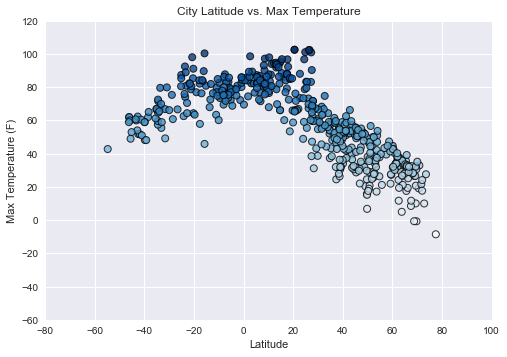

In [158]:
#Build a scatter plot for latitude vs temperature

plt.scatter(citiesdf_nodupes["Latitude"],
           citiesdf_nodupes["Temperature (F)"], c=citiesdf_nodupes["Temperature (F)"],
           edgecolor="black", linewidths=1, marker="o",
           cmap="Blues", alpha=0.8, label="City")

#Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

#Save the figure
plt.savefig("../Latitude_Temperature.png")

#show plot
plt.show()

# Latitude vs. Humidity(%)

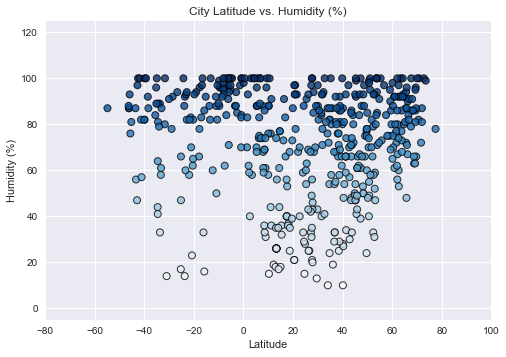

In [154]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(citiesdf_nodupes["Latitude"], 
            citiesdf_nodupes["Humidity (%)"], c=citiesdf_nodupes["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Blues', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("../Latitude_Humidity.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness (%)

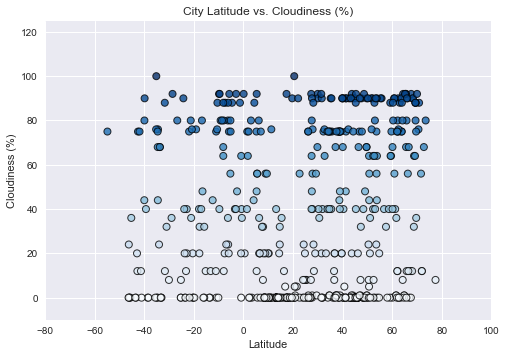

In [155]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(citiesdf_nodupes["Latitude"], 
            citiesdf_nodupes["Cloudiness (%)"], c=citiesdf_nodupes["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Blues', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("../Latitude_Cloudiness.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed (mph)

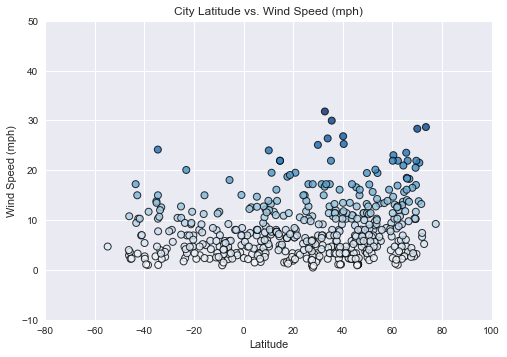

In [156]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(citiesdf_nodupes["Latitude"], 
            citiesdf_nodupes["Wind Speed (mph)"], c=citiesdf_nodupes["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Blues', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("../Latitude_WindSpeed.png")

# Show plot
plt.show()